In [176]:
import numpy as np
from scipy.optimize import curve_fit
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt


def get_data(countrylabel):
    """return dictionary"""
    country = dict({'countrylabel':countrylabel})       # return dictionary with data to this country

    link = "http://www.worldometers.info/coronavirus/country/%s/" % countrylabel  # read this website
    r = requests.get(link)                              # response from website
    soup = BeautifulSoup(r.content, 'html.parser')      # data structure representing a parsed HTML
    charts = soup.find_all("script", 
                           attrs={'type': 'text/javascript', 
                                  'src':'', 'class':'', 'data-cfasync':''})  # find all <script type='text/javascript' in html and store them to a list 
    for i in range(len(charts)):
        if 'coronavirus-cases-linear' in str(charts[i]):                     # find the chart with data wanted
            rawdata = str(charts[i]).replace(" ", "")                        # html to string and omit whitspaces
            time = rawdata.split('xAxis:{\ncategories:[')[1].split("]}")[0]  # split string to time data               
            time = np.array(time.replace("\"", "").split(','))               # make array of strings
            total = rawdata.split('TotalCoronavirusCases')[1].split('data:[')[1].split("]}")[0]  # total cases to time data 
            total = np.array(total.split(','), dtype=int)
            country['time'] = time
            country['total'] = total
            return country
        else:
            pass
        
germany = get_data('germany')

/Users/tobiasb/.conda/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/tobiasb/.conda/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


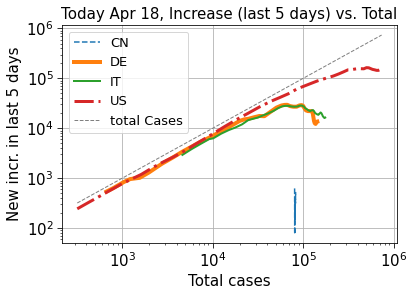

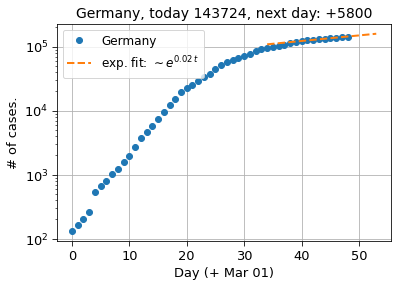

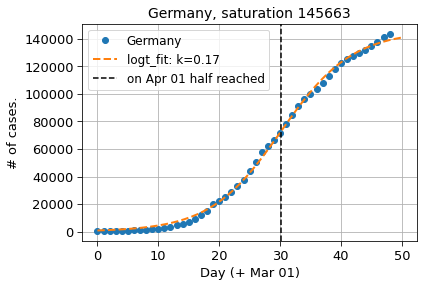

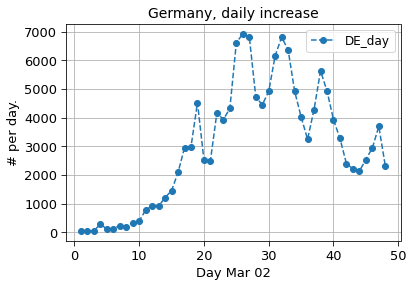

In [76]:
# For data view source code on  https://www.worldometers.info/coronavirus/country/XXX/
# number of total cases is taken, start on 15.02.20

before_time_CN = ["Jan 22","Jan 23","Jan 24","Jan 25","Jan 26","Jan 27","Jan 28","Jan 29","Jan 30","Jan 31","Feb 01",
           "Feb 02","Feb 03","Feb 04","Feb 05","Feb 06","Feb 07","Feb 08","Feb 09","Feb 10","Feb 11","Feb 12",
           "Feb 13","Feb 14"]
time = ["Feb 15","Feb 16","Feb 17","Feb 18","Feb 19","Feb 20","Feb 21","Feb 22","Feb 23","Feb 24","Feb 25",
           "Feb 26","Feb 27","Feb 28","Feb 29","Mar 01","Mar 02","Mar 03","Mar 04","Mar 05","Mar 06","Mar 07",
           "Mar 08","Mar 09","Mar 10","Mar 11","Mar 12","Mar 13","Mar 14","Mar 15","Mar 16","Mar 17","Mar 18",
           "Mar 19","Mar 20","Mar 21","Mar 22","Mar 23","Mar 24","Mar 25","Mar 26","Mar 27","Mar 28","Mar 29",
           "Mar 30","Mar 31","Apr 01","Apr 02","Apr 03","Apr 04","Apr 05","Apr 06","Apr 07","Apr 08","Apr 09",
           "Apr 10","Apr 11","Apr 12","Apr 13","Apr 14","Apr 15","Apr 16","Apr 17","Apr 18"]
Data_DE = [16,16,16,16,16,16,16,16,16,16,18,26,48,74,79,130,165,203,262,545,670,800,1040,1224,1565,1966,2745,3675,
           4599,5813,7272,9367,12327,15320,19848,22364,24873,29056,32991,37323,43938,50871,57695,62435,66885,71808,
           77981,84794,91159,96092,100123,103375,107663,113296,118235,122171,125452,127854,130072,132210,134753,
           137698,141397,143724]
  
Data_FR = [12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,130,191,212,285,423,653,949,1209,1412,1784,2281,2876,3661,
           4499,5423,6633,7730,9134,10995,12612,14459,16018,19856,22304,25233,29155,32964,37575,40174,44550,52128,
           56989,59105,76460,83019,87719,90452,99180,103061,107696,113927,118178,120633,124298,130253,133644,146060,
           147969,151793]       

Data_IT = [3,3,3,3,3,4,21,79,157,229,323,470,655,889,1128,1701,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,
           15113,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138,63927,69176,74386,80589,86498,92472,
           97689,101739,105792,110574,115242,119827,124632,128948,132547,135586,139422,143626,147577,152271,156363,
           159516,162488,165155,168941,172434,175925]       

Data_US = [15,15,15,15,15,15,35,35,35,53,57,60,60,63,68,75,100,124,158,221,319,435,541,704,994,1301,1630,2183,2770,
           3613,4596,6346,9296,13865,19497,24345,33745,44056,55222,68673,86061,104804,124256,144321,165053,189967,
           216622,246729,279183,313379,338779,370019,403521,435518,469124,502876,532879,560300,586941,617661,648003,
           677570,709735,738792]    
       
before_Data_CN = [571,830,1287,1975,2744,4515,5974,7711,9692,11791,14380,17205,20440,24324,28018,31161,34546,37198,40171,
          42638,44653,58761,63851,66492]
Data_CN = [68500,70548,72436,74185,74576,75465,76288,76936,77150,77658,78064,78497,
          78824,79251,79824,80026,80151,80270,80409,80552,80651,80695,80735,80754,80778,80793,80813,80824,80844,
          80860,80881,80894,80928,80967,81008,81054,81093,81171,81218,81285,81340,81394,81439,81439,81518,81554,
          81589,81620,81639,81669,81708,81740,81802,81865,81907,81953,82052,82160,82249,82295,82341,82367,82692,
          82719]
# cast to numpy arrays
time, Data_DE, Data_FR, Data_IT, Data_US, Data_CN = np.array(time), np.array(Data_DE), np.array(Data_FR), np.array(Data_IT), np.array(Data_US), np.array(Data_CN)

start_date = "Mar 01"  # analysis starting on
x0 = 5 # increase during last x0 days


start_ind = np.argwhere(time == start_date)[0][0]   # all Data need to have the same starting date!!

#------- dN as function of N (linear for exponential growth)-------------
Data = Data_CN[start_ind:]
X_tot = []
Y_incr = []
for i in range(x0,len(Data)):
    Y_incr.append(Data[i]-Data[i-x0])
    X_tot.append(Data[i])
plt.loglog(X_tot,Y_incr,'--',label='CN')

Data = Data_DE[start_ind:]
X_tot = []
Y_incr = []
for i in range(x0,len(Data)):
    Y_incr.append(Data[i]-Data[i-x0])
    X_tot.append(Data[i])
plt.loglog(X_tot,Y_incr,lw=4,label='DE')

Data = Data_IT[start_ind:]
X_tot = []
Y_incr = []
for i in range(x0,len(Data)):
    Y_incr.append(Data[i]-Data[i-x0])
    X_tot.append(Data[i])
plt.loglog(X_tot,Y_incr,'-',lw=2,label='IT')


Data = Data_US[start_ind:]
X_tot = []
Y_incr = []
for i in range(x0,len(Data)):
    Y_incr.append(Data[i]-Data[i-x0])
    X_tot.append(Data[i])
plt.loglog(X_tot,Y_incr,'-.',lw=3,label='US')

plt.loglog(X_tot, X_tot,'--', lw=1, color='grey', label='total Cases')

plt.title('Today %s, Increase (last %s days) vs. Total' % (time[-1], x0),fontsize=15)
plt.xlabel('Total cases',fontsize=15)
plt.ylabel('New incr. in last %s days'%x0,fontsize=15)
plt.tick_params(labelsize=15,length=5)
plt.grid()
plt.legend(fontsize=13)
plt.show()

# Germany，data from March 1st
Y_num = Data_DE[start_ind:]
lab = 'Germany'
X_date = np.arange(len(Y_num)) 

#-------exponetial fit ------------
n_fit = 7                   # make fit over last week
X_data_B = X_date[-n_fit:]
Y_fit_B = Y_num[-n_fit:]

def fun_exp(x, a, b):
    return a*np.exp(b*x)
popt, _ = curve_fit(fun_exp, X_data_B,Y_fit_B, p0=(20000,0.2))

xx = np.linspace(len(Y_num)-15,len(Y_num)+4)
yy = fun_exp(xx, *popt)
plt.semilogy(X_date,Y_num,'o',label=lab)
plt.semilogy(xx, fun_exp(xx, *popt),'--',lw=2,label=r'exp. fit: $\sim e^{%.2f\, t}$' % popt[1])

plt.title('%s, today %d, next day: +%.0f'%(lab,Y_num[-1], -Y_num[-1] + fun_exp(len(X_date)+1,*popt)),fontsize=14)
plt.xlabel('Day (+ %s)' % start_date,fontsize=13)
plt.ylabel('# of cases.',fontsize=13)
plt.tick_params(labelsize=13,length=5)
plt.legend(fontsize=12,loc='upper left')
plt.grid()
plt.show()

# ------- logistic fit ---------
# logistic function, L: max of the curve; k: growth rate; x0: midpoint
def fun_logt(x,L,x0,k):
    """
    x: argument
    L: saturation
    x0: time when half saturation is reached"""
    #k = k_CN
    y = L/(1+np.exp(-k*(x-x0)))
    return y

popt, _ = curve_fit(fun_logt, X_date, Y_num, p0=(60000,30,0.25))
xx = np.linspace(0, len(Y_num) + 1)
yy = fun_logt(xx, *popt)
plt.plot(X_date,Y_num,'o',label=lab)
plt.plot(xx, fun_logt(xx, *popt),'--',lw=2,label='logt_fit: k=%.2f'%popt[2])

L, x0, k = popt[0], popt[1], popt[2]
halftime = time[start_ind + int(x0) + 1]     # date on which half saturation is reached
plt.axvline(x0, ls='--', color='black', label=r'on %s half reached' % halftime)
plt.title('%s, saturation %.0f'%(lab, L),fontsize=14)
plt.xlabel('Day (+ %s)' % start_date,fontsize=13)
plt.ylabel('# of cases.',fontsize=13)
plt.tick_params(labelsize=13,length=5)
plt.legend(fontsize=12,loc='upper left')
plt.grid()
plt.show()

## Daily increase
Y_add = Y_num[1:] - Y_num[:-1]
X_add = np.arange(1, len(Y_num))

plt.plot(X_add,Y_add,'o--',label='DE_day')
plt.title('%s, daily increase'%lab,fontsize=14)
plt.xlabel('Day %s' % time[start_ind + 1],fontsize=13)
plt.ylabel('# per day.',fontsize=13)
plt.tick_params(labelsize=13,length=5)
plt.legend(fontsize=12)
plt.grid()
plt.show()

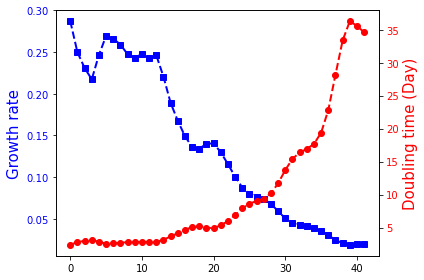

In [168]:
# history of exponential growth rate 
n_fit = 7                            # make fit over one week
goback = len(Y_num) - n_fit          # go back to first week
k_hist = np.zeros(goback)          
for goback, i in enumerate(np.arange(goback)[::-1]):
    takeind = (len(Y_num) - 1) - (np.arange(n_fit)[::-1] + goback)
    X_data_B = X_date[takeind]
    Y_fit_B = Y_num[takeind]
    popt, _ = curve_fit(fun_exp, X_data_B, Y_fit_B, p0=(20000,0.2))
    k_hist[i] = popt[1]              # take exponential grwoth rate from fit
doubleT_hist = np.log(2)/k_hist       # doubling time

fig, ax1 = plt.subplots()

ax1.plot(np.arange(len(k_hist)), k_hist,'bs--',lw=2)
ax1.set_ylabel('Growth rate',fontsize=15,color='b')  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(np.arange(len(k_hist)), doubleT_hist,'ro--',lw=2)
ax2.set_xlabel('Date (+ March 14th)',fontsize=15)
ax2.set_ylabel('Doubling time (Day)',fontsize=15,color='r')
ax2.tick_params(axis='y', labelcolor='r')


fig.tight_layout()
plt.show()

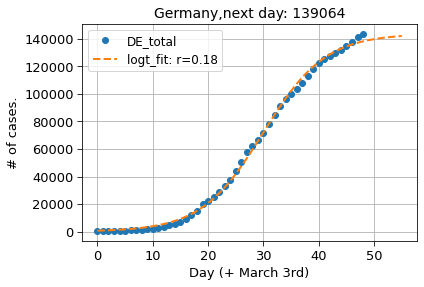

In [170]:
# Another formular for logistic function, K: max of the curve; r: growth rate;
Y_num = Data_DE[start_ind:]

#r_CN=0.235
def fun_logt(t,K,r):
    #r = r_CN
    P0 = Y_num[5]
    y = K/(1+((K-P0)/P0)*np.exp(-r*t))
    return y
popt, pcov = curve_fit(fun_logt, X_date, Y_num, p0=(60000,0.25))

xx = np.linspace(0, 55, 55)
yy = fun_logt(xx, *popt)
plt.plot(X_date,Y_num,'o',label='DE_total')
plt.plot(xx, fun_logt(xx, *popt),'--',lw=2,label='logt_fit: r=%.2f'%popt[1])

plt.title('Germany,next day: %.0f'%(fun_logt(X_date[-1]+1,*popt)),fontsize=14)
plt.xlabel('Day (+ March 3rd)',fontsize=13)
plt.ylabel('# of cases.',fontsize=13)
plt.tick_params(labelsize=13,length=5)
plt.legend(fontsize=12,loc='upper left')
plt.grid()
plt.show()

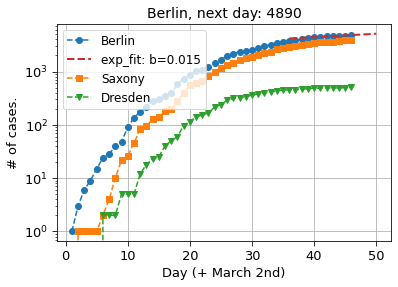

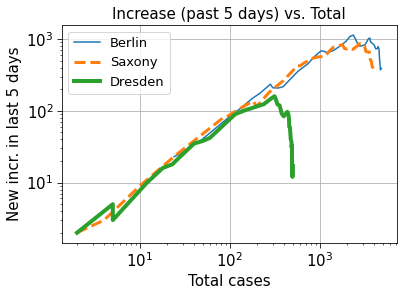

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Germany，data from March 1st
Y_Berlin = [1,3,6,9,15,24,28,40,48,90,137,174,216,283,300,345,391,573,731,866,1025,1077,1220,1428,1656,1955,2161,2360,2464,2575,2754,2970,3202,3471,3613,3670,3845,4028,4202,4349,4458,4567,4601,4668,4722,4848]
Y_Saxony = [0,1,1,1,1,2,4,10,22,26,45,83,93,130,140,182,198,275,394,567,606,653,811,959,1141,1305,1432,1617,1795,1882,2034,2183,2336,2591,2741,2903,2997,3144,3261,3402,3565,3600,3655,3751,3819,3955]
Y_Dresden = [0,0,0,0,0,2,2,2,5,5,5,12,18,23,25,40,50,60,97,115,139,154,167,216,239,287,314,320,339,358,378,398,407,436,448,455,458,466,476,485,486,491,491,492,497,503]
X_date = []
for i in range(len(Y_Berlin)):
    X_date.append(i+1)

n_fit = 5
Y_fit_B = []
X_data_B = []
for i in range(n_fit):
    X_data_B.append(X_date[len(X_date)-n_fit+i])
    Y_fit_B.append(Y_Berlin[len(X_date)-n_fit+i])

def fun_exp(x, a, b):
    return a*np.exp(b*x)
popt, pcov = curve_fit(fun_exp, X_data_B,Y_fit_B, p0=(1,0.2))

xx = np.linspace(len(Y_Berlin)-10, len(Y_Berlin)+4, 50)
yy = fun_exp(xx, *popt)
plt.semilogy(X_date,Y_Berlin,'C0o--',label='Berlin')
plt.semilogy(xx, fun_exp(xx, *popt),'C3--',lw=2,label='exp_fit: b=%5.3f' % popt[1])

plt.semilogy(X_date,Y_Saxony,'C1s--',label='Saxony')
plt.semilogy(X_date,Y_Dresden,'C2v--',label='Dresden')

plt.title('Berlin, next day: %.0f'%(fun_exp(len(X_date)+1,*popt)),fontsize=14)
plt.xlabel('Day (+ March 2nd)',fontsize=13)
plt.ylabel('# of cases.',fontsize=13)
plt.tick_params(labelsize=13,length=5)
plt.legend(fontsize=12,loc='upper left')
plt.grid()
plt.show()

x0 = 5 # increase during last x0 days

Data = Y_Berlin
X_tot = []
Y_incr = []
for i in range(x0,len(Data)):
    Y_incr.append(Data[i]-Data[i-x0])
    X_tot.append(Data[i])
plt.loglog(X_tot,Y_incr,'C0',label='Berlin')

Data = Y_Saxony
X_tot = []
Y_incr = []
for i in range(x0,len(Data)):
    Y_incr.append(Data[i]-Data[i-x0])
    X_tot.append(Data[i])
plt.loglog(X_tot,Y_incr,'C1--',lw=3,label='Saxony')

Data = Y_Dresden
X_tot = []
Y_incr = []
for i in range(x0,len(Data)):
    Y_incr.append(Data[i]-Data[i-x0])
    X_tot.append(Data[i])
plt.loglog(X_tot,Y_incr,'C2',lw=4,label='Dresden')

plt.title('Increase (past %s days) vs. Total'%x0,fontsize=15)
plt.xlabel('Total cases',fontsize=15)
plt.ylabel('New incr. in last %s days'%x0,fontsize=15)
plt.tick_params(labelsize=15,length=5)
plt.grid()
plt.legend(fontsize=13,loc='upper left')
plt.show()

k_CN= 0.2514760711632704 x0= 22.459197330300167


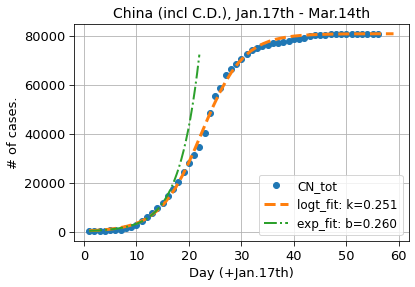

234.74942393933506

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# China, CD: Clinically diagnosed
Y_num_noCD = [62,121,198,291,440,571,830,1287,1975,2744,4515,5974,7711,9692,11791,14380,17205,20438,24324,28018,31161,34546,40171,42638,44653,46472,48467,49970,51091]
Y_num_CD = [62,121,198,291,440,571,830,1287,1975,2744,4515,5974,7711,9692,11791,14380,17205,20438,24324,28018,31161,34546,40171,48315,55220,58761,63851,66492,68500,70548,72436,74185,75002,75891,76288,76936,77150,77658,78064,78497,78824,79251,80026,80151,80270,80409,80552,80651,80695,80735,80754,80778,80793,80813,80824,80844]
Y_num = Y_num_CD
X_date = [] # data from Jan 17st
for i in range(len(Y_num)):
    X_date.append(i+1)

# logistic function, K: max of the curve; r: growth rate;
def fun_logt(t,r):
    K = Y_num[-1]
    P0 = Y_num[0]
    y = K/(1+((K-P0)/P0)*np.exp(-r*t))
    return y
popt, pcov = curve_fit(fun_logt, X_date, Y_num, p0=(0.1))
r_CN = popt[0]

# logistic function, L: max of the curve; k: growth rate; x0: midpoint
def fun_logt(x,k,x0):
    L = max(Y_num)
    y = L/(1+np.exp(-k*(x-x0)))
    return y
popt, pcov = curve_fit(fun_logt, X_date, Y_num, p0=(0.2,20))
k_CN = popt[0]
print('k_CN=',k_CN,'x0=',popt[1])


xx = np.linspace(1, 59, 50)
yy = fun_logt(xx, *popt)
plt.plot(X_date,Y_num,'o',label='CN_tot')
plt.plot(xx,yy,'--',lw=3,label='logt_fit: k=%5.3f' % popt[0])

# exponential fit
Y_num_CD = [62,121,198,291,440,571,830,1287,1975,2744,4515,5974,7711,9692,11791,14380]
Y_num = Y_num_CD
X_date = [] # data from Jan 17st
for i in range(len(Y_num)):
    X_date.append(i+1)
def fun_exp(x, a, b):
    return a*np.exp(b*x)
popt, pcov = curve_fit(fun_exp, X_date, Y_num, p0=(60,0.2))
xx = np.linspace(1, 22, 50)
yy = fun_exp(xx, *popt)
plt.plot(xx,yy,'-.',lw=2,label='exp_fit: b=%5.3f' % popt[1])

#plt.ylim(0,8000)
plt.title('China (incl C.D.), Jan.17th - Mar.14th',fontsize=14)
plt.xlabel('Day (+Jan.17th)',fontsize=13)
plt.ylabel('# of cases.',fontsize=13)
plt.tick_params(labelsize=13,length=5)
plt.legend(fontsize=12)
plt.grid()
plt.show()
popt[0]

15